## 

In [31]:
import pickle
dataset = pickle.load(open('../data/UrbanSound8K_test.pkl', 'rb'))
sample1 = dataset[100]['features']

(60, 41)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=60).
  import sys


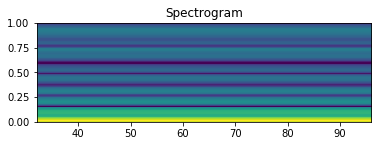

In [32]:
import matplotlib.pyplot as plot

print(sample1['logmelspec'].shape)

plot.subplot(211)
plot.title('Spectrogram')
plot.specgram(sample1['logmelspec'],Fs=2)
plot.show()